#### Mashable (www.mashable.com) -- is a global, multi-platform media and entertainment company. Powered by its own proprietary technology, Mashable is the go-to source for tech, digital culture and entertainment content for its dedicated and influential audience around the globe.

#### Just like any other media company its success depends on the popularity of articles. And one of the key metrics to measure popularity is no. of shares done on article.
Over period of few years Mashable has collected data on around 40,000 articles.

#### You as ML expert have to do analysis and modeling to predict number of shares of an article given the input parameters.

#### https://archive.ics.uci.edu/dataset/332/online+news+popularity

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### load the dataset

In [2]:
df = pd.read_csv("542_proj_dataset_1_v1.0\OnlineNewsPopularity.csv")

#### Drop unnecessary columns

In [3]:
df = df.drop(["url", "timedelta"], axis = 1)

<Axes: >

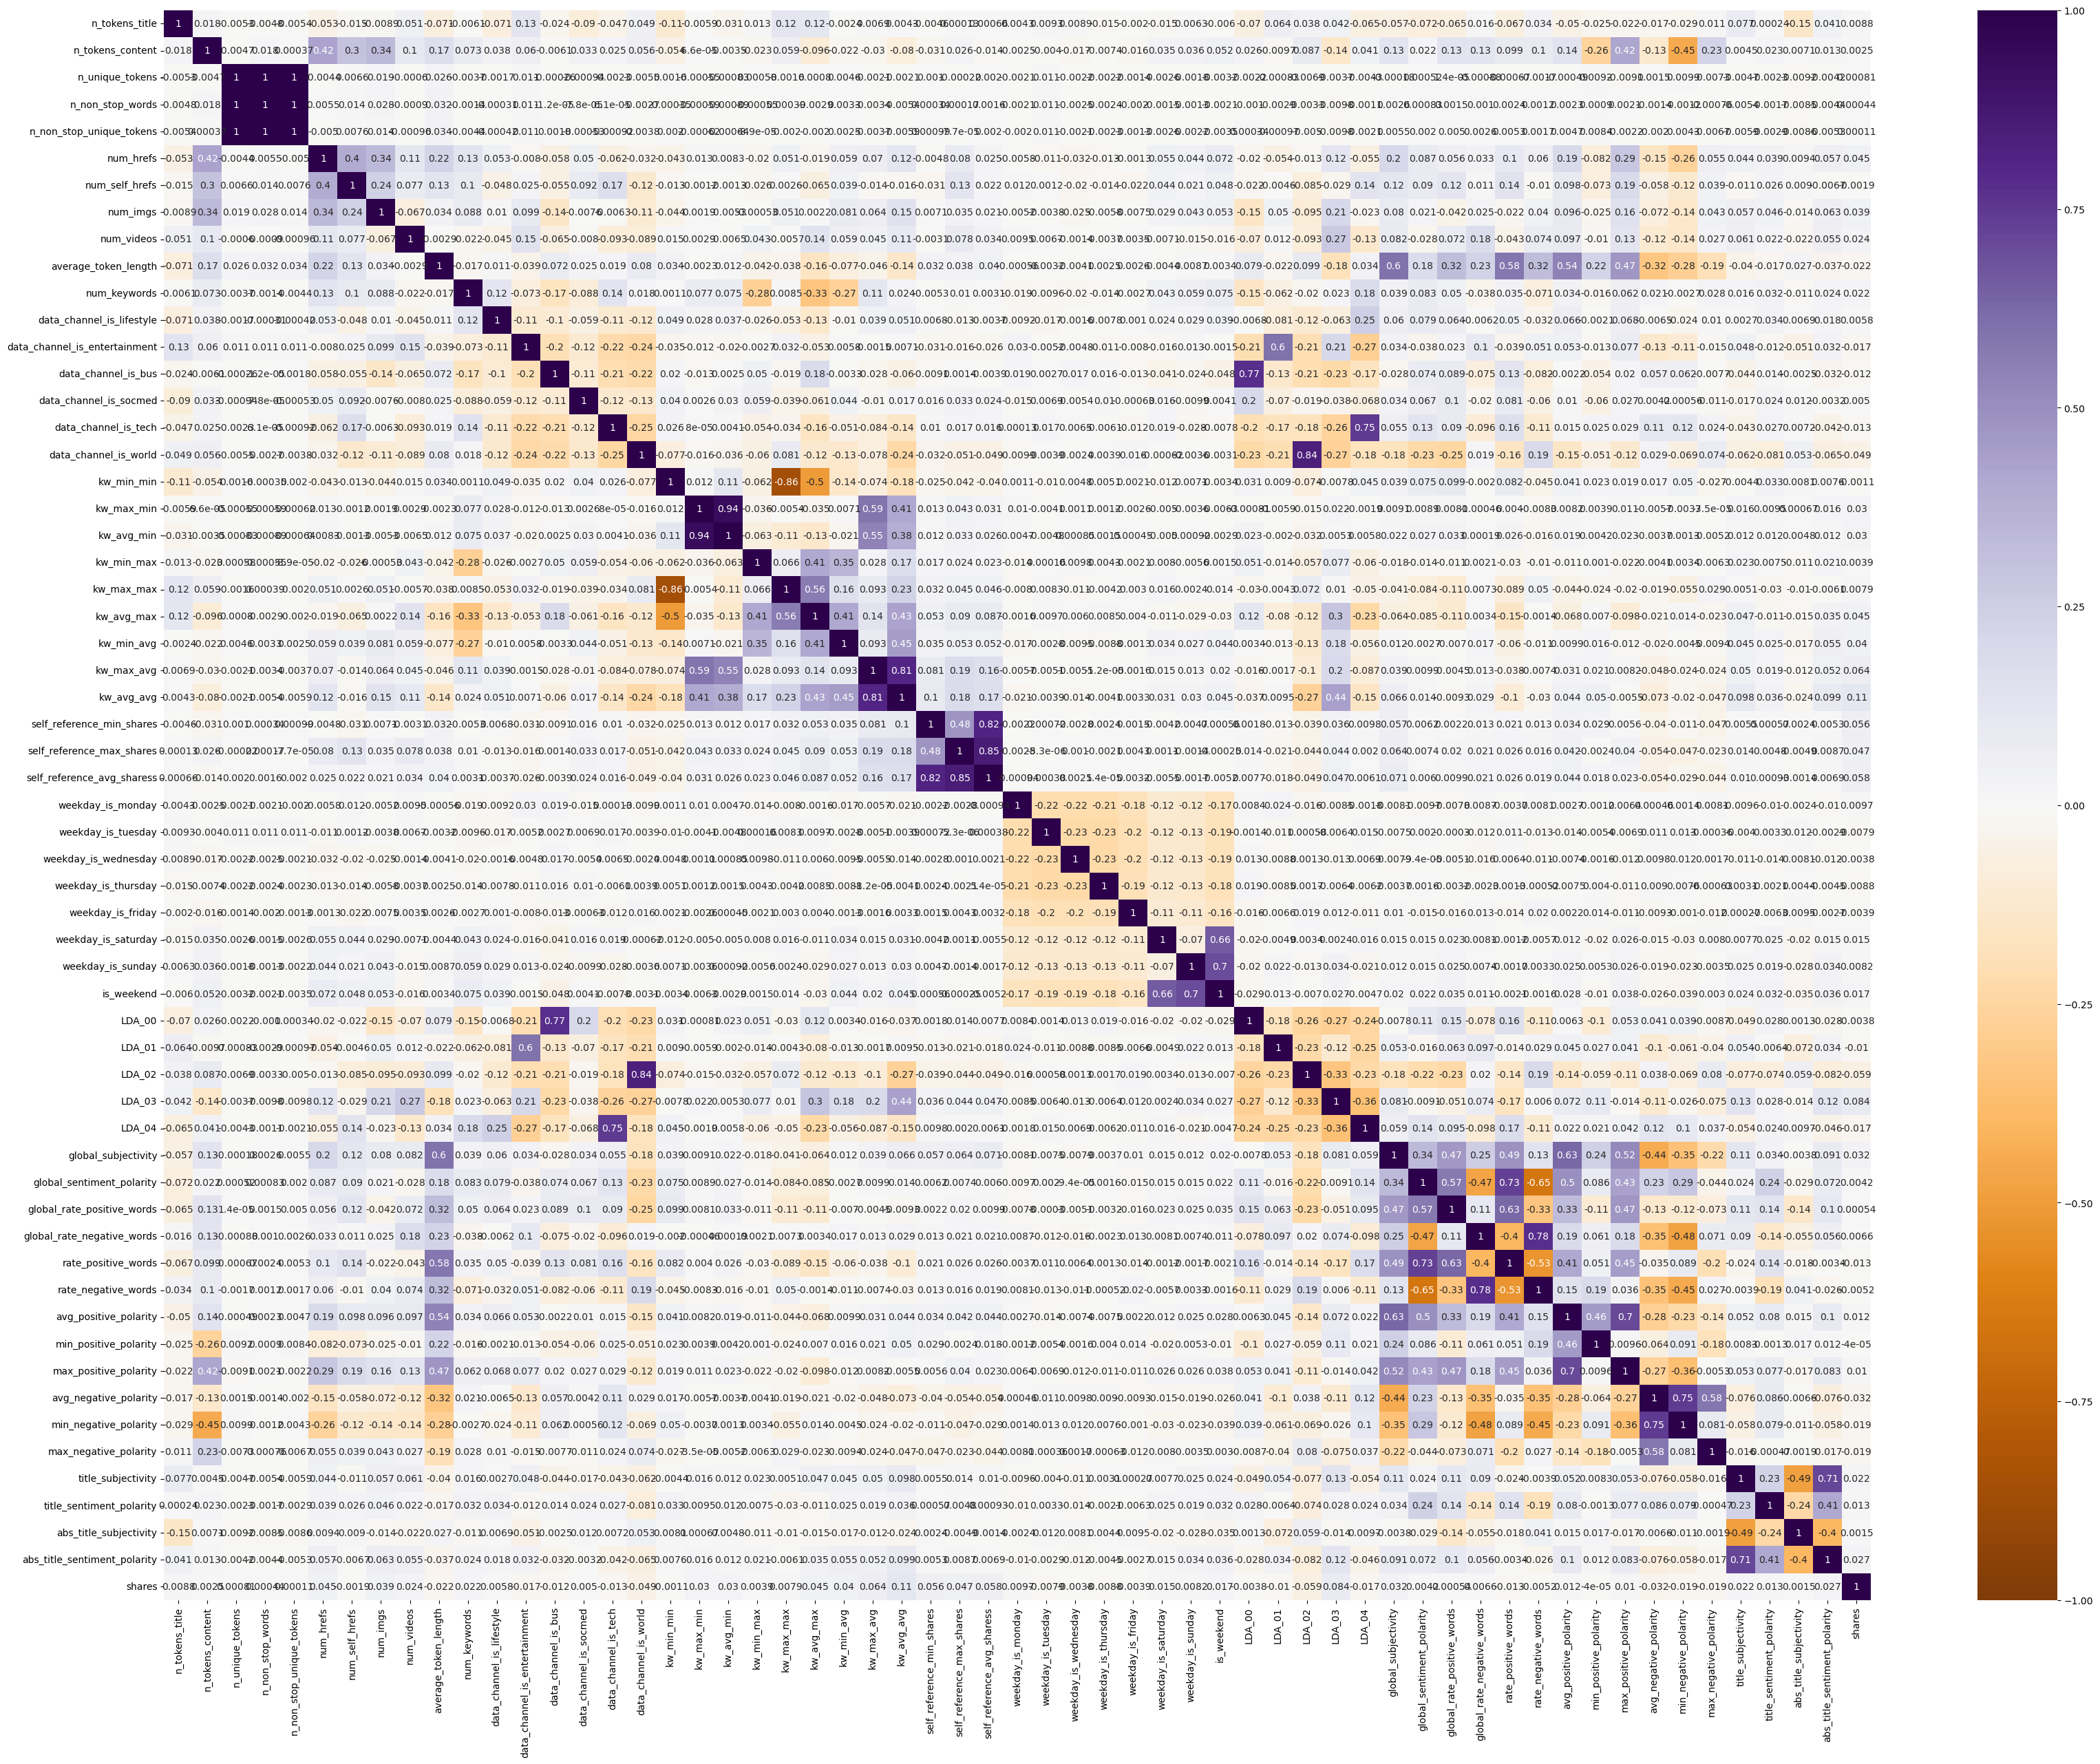

In [4]:
corr = df.corr()
plt.figure(figsize=(40,30))
sns.heatmap(corr, cmap="PuOr", annot=True, vmin=-1, vmax=1, center=0)

## Looks like there is no much correlation between features and output column

In [5]:
# initially apply simple Linear regression and see the result and errors
X = df.drop(["shares"], axis = 1)
y = df["shares"]

#### Apply standardization for the input features

In [6]:
from sklearn.preprocessing import StandardScaler
ssObject = StandardScaler()
X_scaled = ssObject.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0        0.757447         -0.695210         0.032772          0.000675   
1       -0.661657         -0.618794         0.016056          0.000675   
2       -0.661657         -0.712192         0.007645          0.000675   
3       -0.661657         -0.032933        -0.012619          0.000675   
4        1.230482          1.115439        -0.037655          0.000675   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.038658  -0.607463       -0.335566 -0.426526   -0.304268   
1                  0.031479  -0.695709       -0.594963 -0.426526   -0.304268   
2                 -0.007752  -0.695709       -0.594963 -0.426526   -0.304268   
3                 -0.007211  -0.166229       -0.854360 -0.426526   -0.304268   
4                 -0.045420   0.716237        4.074185  1.860061   -0.304268   

   average_token_length  ...  avg_positive_polarity  min_positive_polarity  \
0              0.156474  ...               0.237337               0.063865   
1              0.432838  ...              -0.640040              -0.870968   
2             -0.183415  ...               1.358401               0.063865   
3             -0.169758  ...               0.307442               0.573773   
4              0.159400  ...               0.548135              -0.870968   

   max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0              -0.228941              -0.708369              -0.268895   
1              -0.228941               1.102174               1.367424   
2               0.981798              -1.621797              -0.957871   
3               0.174639              -0.862584              -0.268895   
4               0.981798               0.307944               0.075594   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.969886            0.671245                 -0.975432   
1               0.078642           -0.870807                 -0.269076   
2              -0.270867           -0.870807                 -0.269076   
3              -0.620377           -0.870807                 -0.269076   
4               0.602906            0.531059                  0.244637   

   abs_title_subjectivity  abs_title_sentiment_polarity  
0               -1.810719                      0.138920  
1                0.837749                     -0.689658  
2                0.837749                     -0.689658  
3                0.837749                     -0.689658  
4               -1.569949                     -0.087056  

[5 rows x 58 columns]

In [7]:
X_scaled.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    3.964400e+04      3.964400e+04     3.964400e+04      3.964400e+04   
mean     3.785355e-16      6.703233e-17     1.720616e-17      8.244619e-18   
std      1.000013e+00      1.000013e+00     1.000013e+00      1.000013e+00   
min     -3.972899e+00     -1.160078e+00    -1.557137e-01     -1.904869e-01   
25%     -6.616566e-01     -6.378980e-01    -2.196895e-02      6.750748e-04   
50%     -1.886220e-01     -2.919004e-01    -2.553544e-03      6.750754e-04   
75%      7.574472e-01      3.597638e-01     1.717856e-02      6.750757e-04   
max      5.960828e+00      1.682755e+01     1.989545e+02      1.990003e+02   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              3.964400e+04  3.964400e+04    39644.000000  3.964400e+04   
mean              -1.505539e-17  8.603080e-17        0.000000 -3.441232e-17   
std                1.000013e+00  1.000013e+00        1.000013  1.000013e+00   
min               -2.110943e-01 -9.604492e-01       -0.854360 -5.468724e-01   
25%               -1.943043e-02 -6.074626e-01       -0.594963 -4.265258e-01   
50%                3.984329e-04 -2.544760e-01       -0.076169 -4.265258e-01   
75%                2.004862e-02  2.750039e-01        0.183228 -6.548578e-02   
max                1.988838e+02  2.586653e+01       29.235709  1.485750e+01   

         num_videos  average_token_length  ...  avg_positive_polarity  \
count  3.964400e+04          3.964400e+04  ...           3.964400e+04   
mean  -5.735387e-18         -3.441232e-16  ...           1.032370e-16   
std    1.000013e+00          1.000013e+00  ...           1.000013e+00   
min   -3.042682e-01         -5.386389e+00  ...          -3.384561e+00   
25%   -3.042682e-01         -8.270459e-02  ...          -4.551464e-01   
50%   -3.042682e-01          1.371904e-01  ...           4.716071e-02   
75%   -6.082908e-02          3.630995e-01  ...           5.510083e-01   
max    2.184869e+01          4.137038e+00  ...           6.181076e+00   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
count           3.964400e+04           3.964400e+04           3.964400e+04   
mean           -3.527263e-16           4.588309e-17          -3.670648e-16   
std             1.000013e+00           1.000013e+00           1.000013e+00   
min            -1.338384e+00          -3.053998e+00          -5.797463e+00   
25%            -6.372594e-01          -6.325204e-01          -5.391186e-01   
50%             6.386488e-02           1.746388e-01           4.847016e-02   
75%             6.386488e-02           9.817980e-01           5.685644e-01   
max             1.268410e+01           9.817980e-01           2.031912e+00   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
count           3.964400e+04           3.964400e+04        3.964400e+04   
mean           -8.818157e-17           1.061047e-16        7.886157e-17   
std             1.000013e+00           1.000013e+00        1.000013e+00   
min            -1.646847e+00          -9.358111e+00       -8.708066e-01   
25%            -6.133826e-01          -1.834899e-01       -8.708066e-01   
50%             7.559352e-02           7.864213e-02       -4.081910e-01   
75%             7.645696e-01           6.029062e-01        6.712454e-01   
max             1.798034e+00           1.127170e+00        2.213297e+00   

       title_sentiment_polarity  abs_title_subjectivity  \
count              3.964400e+04            3.964400e+04   
mean               4.444925e-17            1.389039e-16   
std                1.000013e+00            1.000013e+00   
min               -4.036308e+00           -1.810719e+00   
25%               -2.690762e-01           -9.278963e-01   
50%               -2.690762e-01            8.377486e-01   
75%                2.960086e-01            8.377486e-01   
max                3.498156e+00            8.377486e-01   

       abs_title_sentim

#### Split the dataset for training and testing

In [539]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

### Apply Linear regresssion just to strat with to see the error

In [540]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [541]:
lrobj = LinearRegression()
lrobj.fit(train_X, train_y)
pred_y = lrobj.predict(test_X)

In [542]:
mean_absolute_error(test_y, pred_y)

3182.731546765005

In [544]:
error_table = pd.DataFrame({"test_y":(test_y), "pred_y": (pred_y)})
error_table["error"] = error_table["test_y"]-error_table["pred_y"]
error_table.head(50)

test_y       pred_y         error
18273   16400  2773.125029  13626.874971
29007     681  1888.804705  -1207.804705
38604    8700  6735.823642   1964.176358
33449    1100  1566.362766   -466.362766
3172      672  3360.502131  -2688.502131
9621      581  3371.575990  -2790.575990
11241    1100  4615.488708  -3515.488708
20323    2700  2691.907718      8.092282
14995     448   711.249392   -263.249392
25939    1500  2842.684728  -1342.684728
14910     608  2097.921487  -1489.921487
16275     561  1298.079218   -737.079218
3241      783  2746.821419  -1963.821419
38684    1000  2284.956053  -1284.956053
12117     676  2554.386707  -1878.386707
37509    1800  3619.779219  -1819.779219
879      1500  2134.747668   -634.747668
3389     2900  2955.502602    -55.502602
15516    1100  1086.077262     13.922738
29238    1100  3105.086671  -2005.086671
32181    1900  3544.658578  -1644.658578
33859     863  2397.017751  -1534.017751
27326    1500  2400.685452   -900.685452
24272    2400  5420.482349  -3020.482349
38502    4800  3780.829968   1019.170032
15580    1100  3019.296540  -1919.296540
18510     900  2203.454218  -1303.454218
11215     733  1828.270920  -1095.270920
3902     1300  3166.607147  -1866.607147
11488    5300  2916.349976   2383.650024
3723     2200  2700.542445   -500.542445
23417    4000  4101.140396   -101.140396
35370    1800  3864.730846  -2064.730846
1764     1200  2873.398173  -1673.398173
37455    4800  3023.350523   1776.649477
11545     623  2037.912493  -1414.912493
1533      832  3885.450480  -3053.450480
36854     816  3117.544912  -2301.544912
6886      531  1787.956315  -1256.956315
2420     3500  3845.156326   -345.156326
17905     957  3896.913353  -2939.913353
37931     677  1677.480257  -1000.480257
35616    1300  2097.066814   -797.066814
21671    1400  2779.099432  -1379.099432
21022     712  2098.186267  -1386.186267
35468    3300  3234.643425     65.356575
3010      654  1876.788165  -1222.788165
28979     860  2083.448944  -1223.448944
26640    1100  5029.879761  -3929.879761
29039    1500  1191.657463    308.342537

<Axes: ylabel='error'>

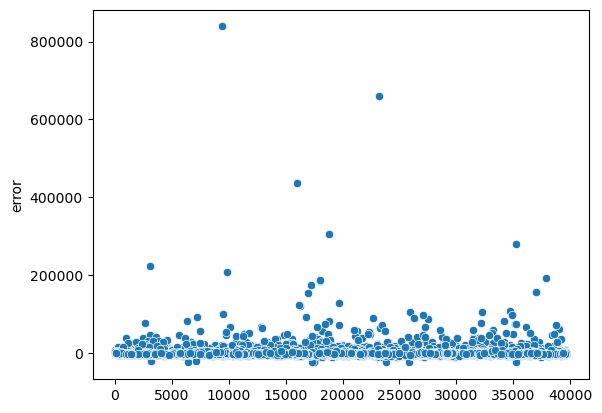

In [545]:
sns.scatterplot(error_table["error"])

### Error is ~3000 which is huge, lets understand the dataset and relations

### Remove dummies in the weekdays

In [455]:
df_weekday = df[["weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", "weekday_is_friday", "weekday_is_saturday", "weekday_is_sunday"]]
df["weekday"] = pd.from_dummies(df_weekday, sep = "_is_")

### Remove dummies in the Channels

In [456]:
channel = df[["data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus", "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world"]]
df["channel"] = pd.from_dummies(channel, sep = "_is_", default_category="none")

### Plot the "share" and "log of share"

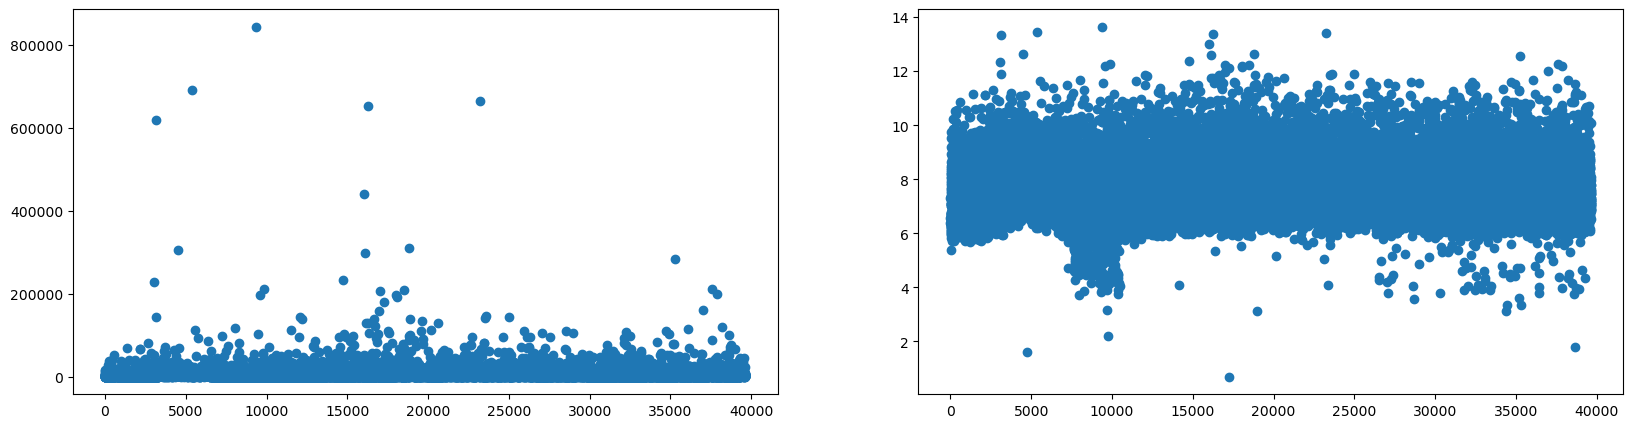

In [431]:
plt.figure(figsize=(20,5))
plt.subplot(1,2, 1)
plt.scatter(range(len(df)), df["shares"])
plt.subplot(1,2, 2)
plt.scatter(range(len(df)), np.log1p(df['shares']))

In [550]:
# Apply log the output data
df["shares_log"] = np.log1p(df['shares'])

### See the correlation diagram

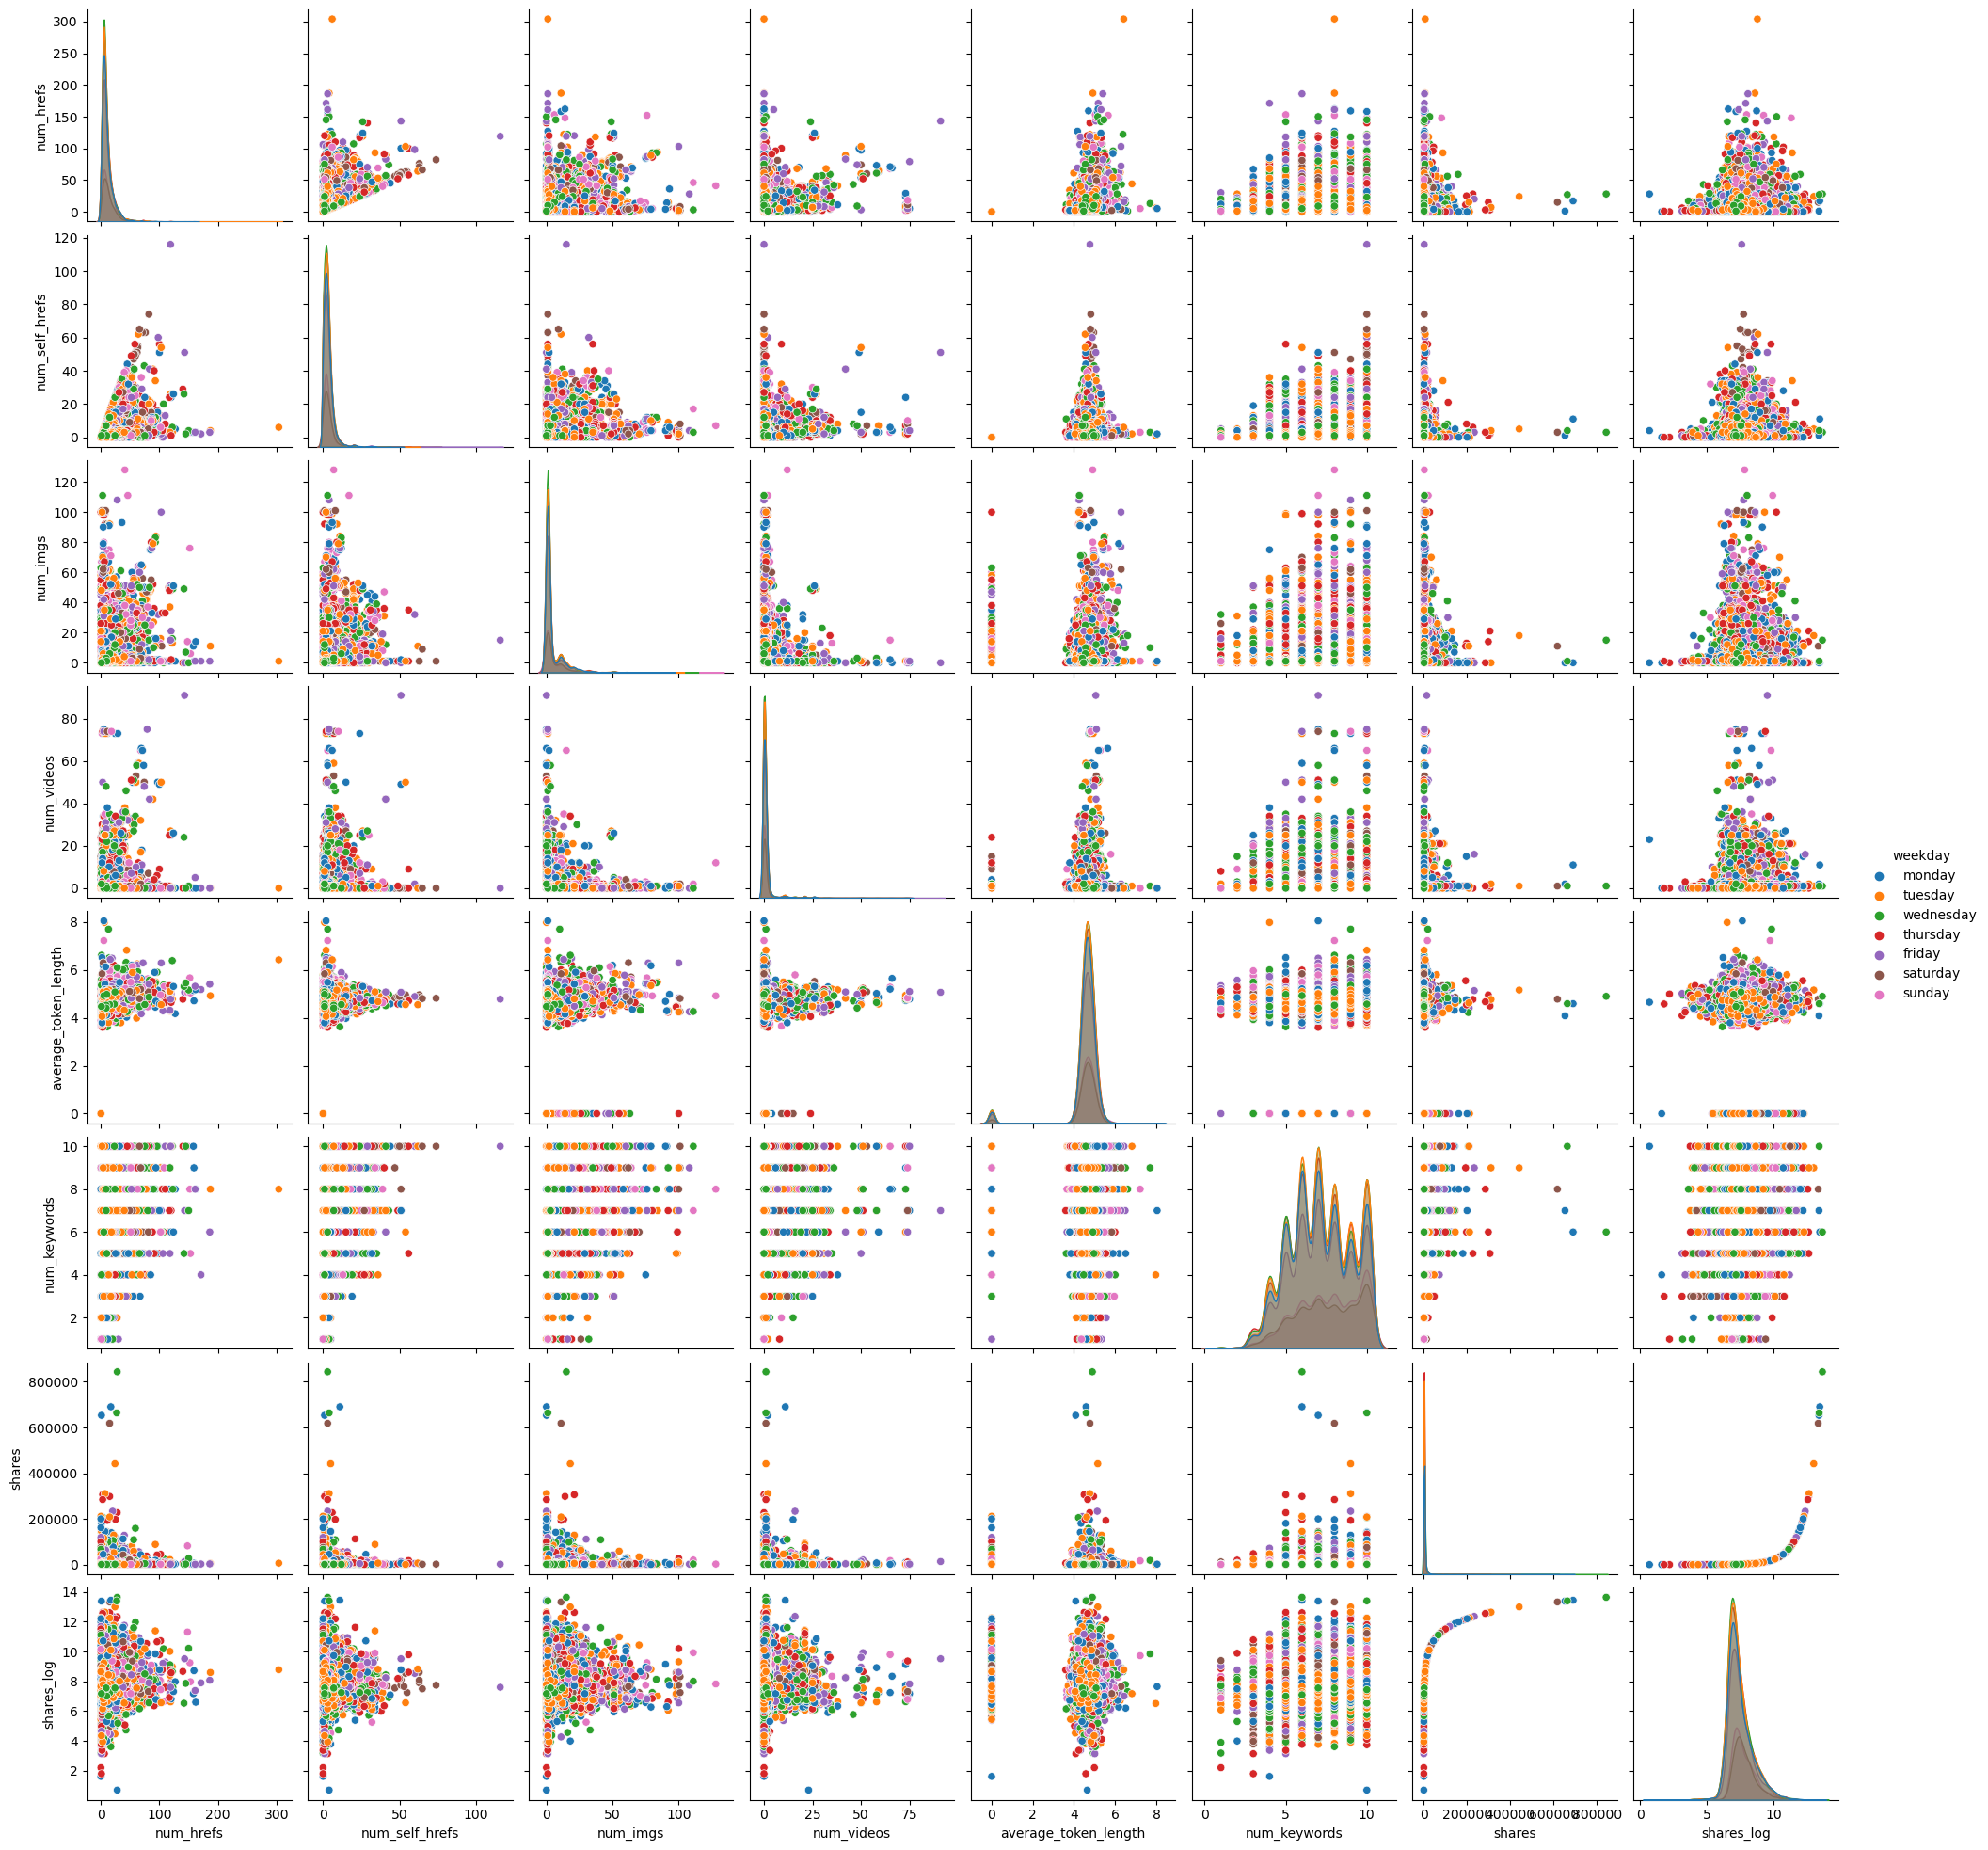

In [352]:
num = ["num_hrefs", "num_self_hrefs", "num_imgs", "num_videos", "average_token_length", "num_keywords", "shares", "shares_log"]
sns.pairplot(df, vars=num, hue= "weekday")

In [433]:
df.head()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0              12               219         0.663594               1.0   
1               9               255         0.604743               1.0   
2               9               211         0.575130               1.0   
3               9               531         0.503788               1.0   
4              13              1072         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385          4               2         1           0   
1                  0.791946          3               1         1           0   
2                  0.663866          3               1         1           0   
3                  0.665635          9               0         1           0   
4                  0.540890         19              19        20           0   

   average_token_length  ...  min_negative_polarity  max_negative_polarity  \
0              4.680365  ...                 -0.600              -0.200000   
1              4.913725  ...                 -0.125              -0.100000   
2              4.393365  ...                 -0.800              -0.133333   
3              4.404896  ...                 -0.600              -0.166667   
4              4.682836  ...                 -0.500              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  weekday        channel  shares_log  
0                      0.187500     593   monday  entertainment    6.386879  
1                      0.000000     711   monday            bus    6.568078  
2                      0.000000    1500   monday            bus    7.313887  
3                      0.000000    1200   monday  entertainment    7.090910  
4                      0.136364     505   monday           tech    6.226537  

[5 rows x 62 columns]

## In the above correlation diagram, i dont see any relation amoung the feature and output

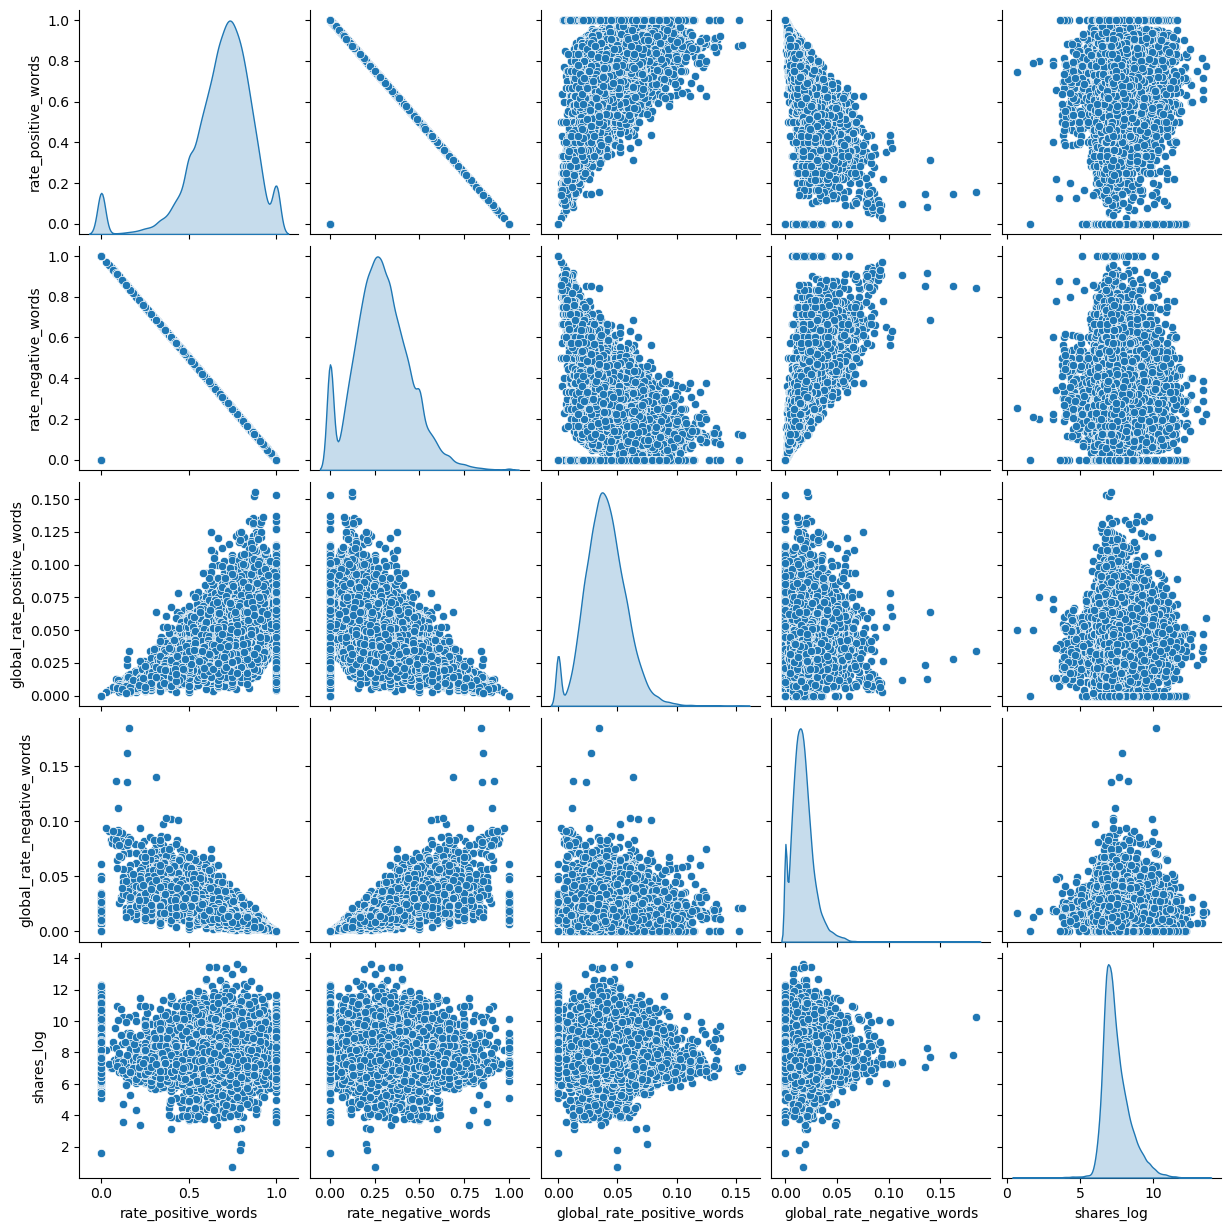

In [340]:
kw_cols = ['rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', 'shares_log']
sns.pairplot(df, vars=kw_cols, diag_kind='kde')

## Draw the boxplot of "share_log" column

<Axes: xlabel='shares_log'>

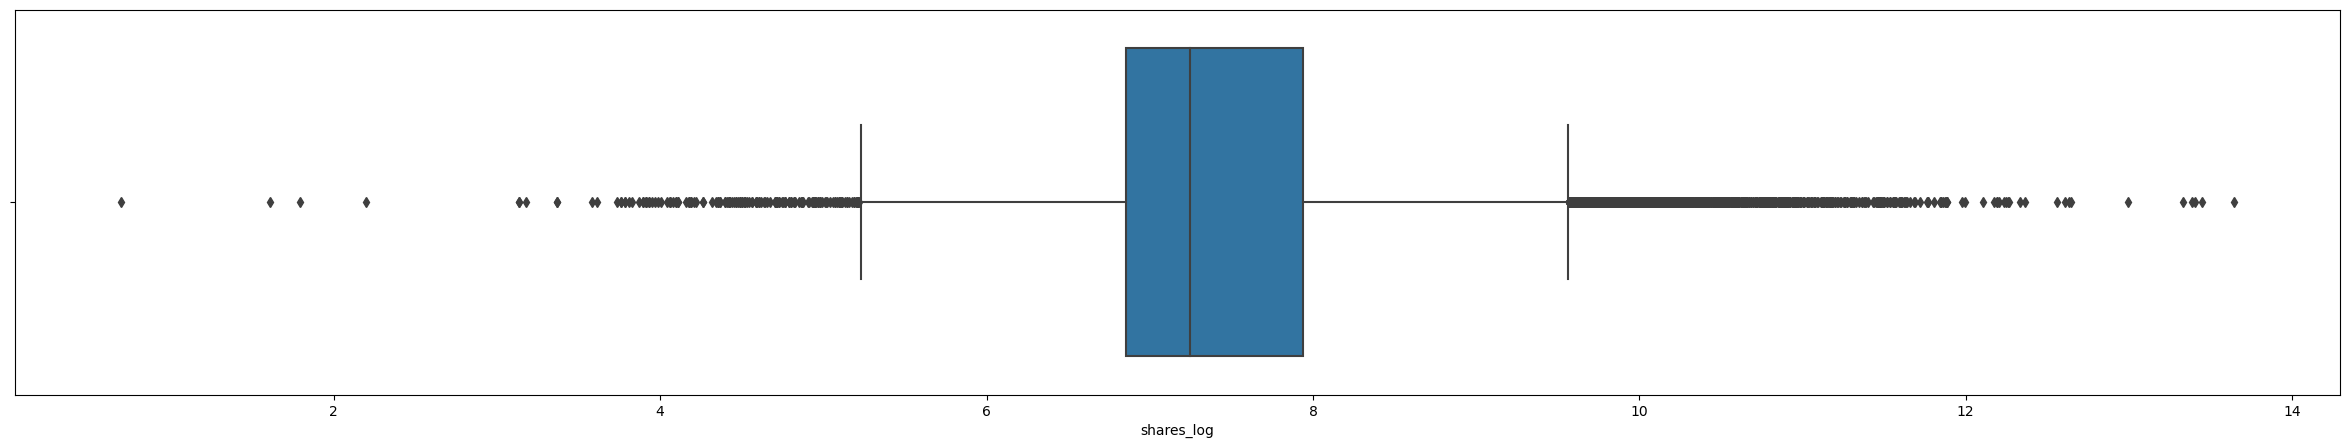

In [551]:
plt.figure(figsize=(30,5))
sns.boxplot(data = df, x = "shares_log")

<Axes: xlabel='shares_log'>

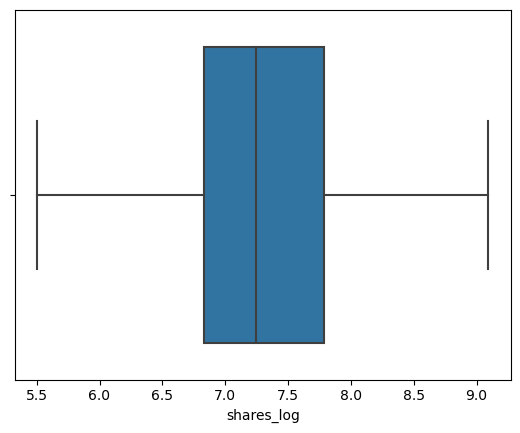

In [552]:
df = df[(df["shares_log"] > 5.5) & (df["shares_log"] < 9.1)]
sns.boxplot(data = df, x = "shares_log")

In [453]:
df.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  36873.000000    36873.000000      36873.000000     36873.000000   
mean     353.734142       10.400076        548.203320         0.549675   
std      214.953057        2.110349        467.498642         3.650340   
min        8.000000        2.000000          0.000000         0.000000   
25%      163.000000        9.000000        249.000000         0.470939   
50%      337.000000       10.000000        413.000000         0.538653   
75%      542.000000       12.000000        718.000000         0.607330   
max      731.000000       23.000000       7764.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      36873.000000              36873.000000  36873.000000   
mean           0.999892                  0.691465     10.722697   
std            5.423900                  3.384890     11.080615   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.626536      4.000000   
50%            1.000000                  0.690647      7.000000   
75%            1.000000                  0.754386     13.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  ...  max_positive_polarity  \
count    36873.000000  36873.000000  36873.000000  ...           36873.000000   
mean         3.315461      4.416782      1.212513  ...               0.755934   
std          3.858891      8.168512      4.001840  ...               0.246373   
min          0.000000      0.000000      0.000000  ...               0.000000   
25%          1.000000      1.000000      0.000000  ...               0.600000   
50%          3.000000      1.000000      0.000000  ...               0.800000   
75%          4.000000      4.000000      1.000000  ...               1.000000   
max        116.000000    128.000000     75.000000  ...               1.000000   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
count           36873.000000           36873.000000           36873.000000   
mean               -0.258209              -0.520069              -0.107157   
std                 0.126798               0.289717               0.094631   
min                -1.000000              -1.000000              -1.000000   
25%                -0.326190              -0.700000              -0.125000   
50%                -0.251595              -0.500000              -0.100000   
75%                -0.185737              -0.300000              -0.050000   
max                 0.000000               0.000000               0.000000   

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
count        36873.000000              36873.000000            36873.000000   
mean             0.278910                  0.070045                0.341784   
std              0.321996                  0.261874                0.189043   
min              0.000000                 -1.000000                0.000000   
25%              0.000000                  0.000000                0.166667   
50%              0.125000                  0.000000                0.500000   
75%              0.500000                  0.136364                0.500000   
max              1.000000                  1.000000                0.500000   

       abs_title_sentiment_polarity        shares    shares_log  
count                  36873.000000  36873.000000  36873.000000  
mean                       0.153505   1964.770971      7.331510  
std                        0.223428   1614.053542      0.679524  
min                        0.000000    245.000000      5.505332  
25%                        0.000000    928.000000      6.834109  
50%                        0.000000   1400.000000      7.244942  
75%                        0.250000   2400.000000      7.783641  
max                        1.000000   8900.000000      9.093919  


## After removing the outliers, check the score with only with the feature whose correlation value is above  0.01 

In [553]:
#df = pd.read_csv("542_proj_dataset_1_v1.0\OnlineNewsPopularity.csv")
# Apply log the output data
df["shares_log"] = np.log1p(df['shares'])

In [554]:
X = df.drop(["n_tokens_content", "n_unique_tokens","n_non_stop_words","n_non_stop_unique_tokens", "num_self_hrefs","kw_min_min","kw_min_max","LDA_00", "global_sentiment_polarity","global_rate_positive_words", "min_positive_polarity","abs_title_subjectivity","shares", "shares_log"], axis = 1)
y = df["shares_log"]

In [555]:
from sklearn.preprocessing import StandardScaler
ssObject = StandardScaler()
X_scaled = ssObject.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

n_tokens_title  num_hrefs  num_imgs  num_videos  average_token_length  \
0        0.758143  -0.606716 -0.418293   -0.302993              0.151045   
1       -0.663442  -0.696965 -0.418293   -0.302993              0.433539   
2       -0.663442  -0.696965 -0.418293   -0.302993             -0.196383   
3       -0.663442  -0.155472 -0.418293   -0.302993             -0.182424   
4        1.232005   0.747018  1.907744   -0.302993              0.154036   

   num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
0     -1.157637                  -0.234631                       2.144457   
1     -1.680783                  -0.234631                      -0.466319   
2     -0.634491                  -0.234631                      -0.466319   
3     -0.111346                  -0.234631                       2.144457   
4     -0.111346                  -0.234631                      -0.466319   

   data_channel_is_bus  data_channel_is_socmed  ...  rate_positive_words  \
0            -0.441109               -0.249142  ...             0.452101   
1             2.267016               -0.249142  ...             0.261687   
2             2.267016               -0.249142  ...             0.918422   
3            -0.441109               -0.249142  ...            -0.091940   
4            -0.441109               -0.249142  ...             0.934718   

   rate_negative_words  avg_positive_polarity  max_positive_polarity  \
0            -0.364454               0.248370              -0.227034   
1            -0.133938              -0.641987              -0.227034   
2            -0.928982               1.386018               0.990647   
3             0.294162               0.319511               0.178859   
4            -0.948711               0.563765               0.990647   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.723929              -0.275896              -0.981125   
1               1.099868               1.363655               0.075630   
2              -1.644042              -0.966234              -0.276621   
3              -0.879273              -0.275896              -0.628873   
4               0.299824               0.069272               0.604008   

   title_subjectivity  title_sentiment_polarity  abs_title_sentiment_polarity  
0            0.686635                 -0.983483                      0.152152  
1           -0.866201                 -0.267481                     -0.687056  
2           -0.866201                 -0.267481                     -0.687056  
3           -0.866201                 -0.267481                     -0.687056  
4            0.545468                  0.253248                     -0.076723  

[5 rows x 46 columns]

In [556]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [557]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [558]:
lrobj = LinearRegression()
lrobj.fit(train_X, train_y)
pred_y = lrobj.predict(test_X)

In [559]:
mean_absolute_error(np.expm1(test_y), np.expm1(pred_y))

1005.517836292464

### Now, after removing the outliers and selecting only the required features, the error is now ~1000, which is much better than previous model

### Lets try with Randomforest regression 

In [560]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [561]:
rfrObj = RandomForestRegressor(n_estimators=50)

In [562]:
rfrObj.fit(train_X, train_y)

RandomForestRegressor(n_estimators=50)

In [563]:
pred_y = rfrObj.predict(test_X)

In [564]:
mean_absolute_error(np.expm1(test_y), np.expm1(pred_y))

1000.204068435215

In [565]:
mean_squared_error(np.expm1(test_y), np.expm1(pred_y))

2577424.700338696

In [566]:
error_table = pd.DataFrame({"test_y":np.expm1(test_y), "pred_y": np.expm1(pred_y)})
error_table["error"] = error_table["test_y"]-error_table["pred_y"]
error_table.head(50)

test_y       pred_y        error
656    2200.0  1348.745843   851.254157
33622  1100.0  1316.319821  -216.319821
35645   818.0  1507.822454  -689.822454
17287   867.0  1593.156136  -726.156136
22698  4100.0  1565.072138  2534.927862
10655   743.0   799.225359   -56.225359
27898  1600.0  1067.347948   532.652052
3339   1100.0  2053.597106  -953.597106
24131   997.0  1317.803136  -320.803136
36095  1200.0   974.258503   225.741497
29592  3900.0  1826.836727  2073.163273
35576   757.0  1217.055358  -460.055358
27544  3100.0  1861.957677  1238.042323
8957   2800.0  1186.073198  1613.926802
37170  2700.0  2388.978427   311.021573
14451  1900.0  1672.476557   227.523443
7932   3500.0  1387.464605  2112.535395
18546   863.0  1531.570917  -668.570917
17027  2700.0  1450.943790  1249.056210
19143  4900.0  1621.874282  3278.125718
18423   595.0  1018.797599  -423.797599
35963   696.0  1351.876510  -655.876510
29498  1200.0  1662.544034  -462.544034
22498  2700.0  1439.965132  1260.034868
23091   969.0  1548.394962  -579.394962
36081  1300.0  1561.763949  -261.763949
4620   4600.0  1980.398511  2619.601489
38789  3100.0  1224.391216  1875.608784
38919  6700.0  2232.124675  4467.875325
20476   587.0  1477.174811  -890.174811
8641   1700.0  1150.796604   549.203396
24364   788.0  1422.853550  -634.853550
19525  1400.0  2324.494498  -924.494498
6922    684.0  1711.435649 -1027.435649
39529   836.0  1194.931789  -358.931789
23890   827.0  1776.174394  -949.174394
27005  3400.0  2889.058102   510.941898
38605   703.0   996.559487  -293.559487
36475   996.0  1432.346588  -436.346588
2474    775.0  1078.575567  -303.575567
25592   718.0  1037.117525  -319.117525
2958   2000.0  1638.227080   361.772920
39405  1500.0  1396.263849   103.736151
9701   8400.0  1405.404744  6994.595256
23838  5800.0  1978.741971  3821.258029
38990   987.0   818.991986   168.008014
9211   2900.0  1685.852800  1214.147200
38951  4900.0  1441.410925  3458.589075
2625   1400.0  1863.459388  -463.459388
6113   3100.0  1598.270283  1501.729717

## With Random forest regressor, error did not reduce much. Maximum achieved mean absolute error is ~1000